In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Create a list to store individual stock DataFrames
def yahoo_download(ticks):
    """
    yahoo_download downloads the tickers in ticks and stores them in a dataframe.
    """
    # Fetch the list of S&P 500 tickers from Wikipedia
    df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    tickers = df['Symbol'].tolist()
    
    equities = []
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, period = '3y')['Adj Close']
            stock_data.name = ticker  # Rename the Series to match the ticker
            equities.append(stock_data)
        except Exception as e:
            print(f"Failed to download data for {ticker}: {e}")

    # Concatenate all the individual DataFrames
    closing_prices = pd.concat(equities, axis=1)
    return closing_prices

# Read pickle file if exists, otherwise download stocks from Yahoo Finance
try:
    closing_prices = pd.read_pickle("./closing_prices_SP500.pkl")
except FileNotFoundError:
    closing_prices = yahoo_download(tickers)

# Drop rows with any missing values for consistency
closing_prices.dropna(axis=1, inplace=True)
closing_prices.to_pickle("./closing_prices_SP500.pkl")


,MMM,AOS,ABT,ABBV,ACN,ADM,ADBE,ADP,AES,AFL,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-19,149.706314,52.065052,102.587288,74.427528,217.021957,47.067364,495.200012,136.675720,18.361498,33.858604,...,203.923935,360.093262,69.328735,65.711998,87.317108,92.131264,291.570007,134.847916,27.405924,156.705200
2020-10-20,150.942459,52.226105,102.891151,74.374565,221.002869,47.591263,494.579987,138.155075,18.453770,34.257706,...,200.750610,361.150238,72.085167,65.565346,88.340744,92.159691,294.829987,134.752930,27.677994,156.607101
2020-10-21,149.370773,51.922958,100.583771,73.173958,223.602448,47.535145,495.959991,138.371780,18.647533,34.016392,...,200.721848,358.844025,72.493156,65.565346,87.655098,93.855484,291.859985,134.677002,27.260826,158.068359
2020-10-22,150.730530,52.017693,103.954620,74.427528,218.844528,48.349068,483.600006,140.256332,18.832069,34.814587,...,200.903992,347.870361,76.055618,65.455353,87.742012,94.594414,300.910004,135.845047,29.246895,159.245178
2020-10-23,149.927048,52.036640,102.349907,74.454002,220.340973,48.526817,488.500000,140.586121,19.053511,35.130157,...,201.086182,346.919159,76.184982,65.510330,88.446968,95.949150,303.720001,135.522186,30.108431,160.333755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11,90.389999,71.089996,92.129997,147.860001,312.540009,73.699997,549.909973,249.460007,13.390000,79.800003,...,210.600006,714.289978,94.730003,58.810001,92.370003,118.379997,217.160004,105.349998,35.650002,176.949997
2023-10-12,89.019997,69.930000,90.190002,148.300003,304.359985,72.769997,559.630005,247.649994,13.050000,79.860001,...,210.350006,735.380005,93.550003,58.150002,91.290001,116.250000,210.869995,102.720001,35.200001,174.309998
2023-10-13,88.680000,70.260002,90.870003,147.960007,301.829987,73.320000,548.760010,247.500000,13.160000,80.250000,...,213.240005,731.460022,90.279999,58.860001,90.169998,116.879997,206.919998,104.300003,34.570000,174.380005


In [20]:
def prices_to_perc_change(prices):
    return [100*(prices[i+1]-prices[i])/prices[i] for i in range(len(prices)-1)]

pcdf = pd.DataFrame({t:prices_to_perc_change(closing_prices[t]) for t in closing_prices.columns})

In [93]:
maxpercchanges = [max((pcdf.T[i].apply(abs)).values) for i in pcdf.T.columns]
pcdf_transposed_normalized = (pcdf.T).copy()
for i in pcdf_transposed_normalized.columns:
    pcdf_transposed_normalized[i] = pcdf_transposed_normalized[i]/maxpercchanges[i]
pcdf_l1norm = (pcdf_transposed_normalized.T).copy()

In [96]:
dfs = [closing_prices,pcdf,pcdf_l1norm]

In [97]:
dfs_l2 = [df.copy() for df in dfs]
for df in dfs_l2:
    for ticker in df.columns:
        df[ticker] = df[ticker]/np.linalg.norm(df[ticker])

In [98]:
dfs_l2[0]

,MMM,AOS,ABT,ABBV,ACN,ADM,ADBE,ADP,AES,AFL,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-19,0.038797,0.029534,0.033946,0.021228,0.026975,0.023720,0.037751,0.023588,0.029282,0.020953,...,0.033736,0.024720,0.026337,0.037159,0.030782,0.028225,0.026388,0.037401,0.020498,0.032384
2020-10-20,0.039117,0.029625,0.034046,0.021213,0.027470,0.023984,0.037704,0.023843,0.029429,0.021200,...,0.033211,0.024792,0.027384,0.037076,0.031143,0.028234,0.026683,0.037374,0.020701,0.032363
2020-10-21,0.038710,0.029453,0.033283,0.020870,0.027793,0.023956,0.037809,0.023881,0.029738,0.021051,...,0.033207,0.024634,0.027539,0.037076,0.030901,0.028753,0.026415,0.037353,0.020389,0.032665
2020-10-22,0.039062,0.029507,0.034398,0.021228,0.027201,0.024366,0.036867,0.024206,0.030033,0.021545,...,0.033237,0.023881,0.028892,0.037014,0.030932,0.028979,0.027234,0.037677,0.021875,0.032909
2020-10-23,0.038854,0.029518,0.033867,0.021235,0.027387,0.024455,0.037240,0.024263,0.030386,0.021740,...,0.033267,0.023815,0.028941,0.037045,0.031181,0.029394,0.027488,0.037588,0.022519,0.033134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11,0.023425,0.040326,0.030486,0.042172,0.038847,0.037142,0.041922,0.043053,0.021354,0.049384,...,0.034841,0.049035,0.035986,0.033256,0.032564,0.036266,0.019654,0.029219,0.026664,0.036567
2023-10-12,0.023070,0.039668,0.029844,0.042298,0.037830,0.036673,0.042663,0.042740,0.020812,0.049421,...,0.034799,0.050482,0.035538,0.032883,0.032183,0.035614,0.019085,0.028490,0.026327,0.036022
2023-10-13,0.022982,0.039855,0.030069,0.042201,0.037516,0.036950,0.041834,0.042714,0.020987,0.049662,...,0.035277,0.050213,0.034296,0.033285,0.031788,0.035807,0.018727,0.028928,0.025856,0.036036


In [101]:
silhouette_scores = [[] for df in dfs_l2]
dfsT = [df.T for df in dfs_l2]

for i in range(3,101):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    for j in [0,1,2]:
        df = dfsT[j]
        ypred = kmeans.fit(df)
        labels = kmeans.labels_
        score = metrics.silhouette_score(df, labels, metric = 'euclidean')
        silhouette_scores[j].append(score)


In [29]:
from sklearn import metrics

In [51]:
noclusters = [i for i in range(3,101)]


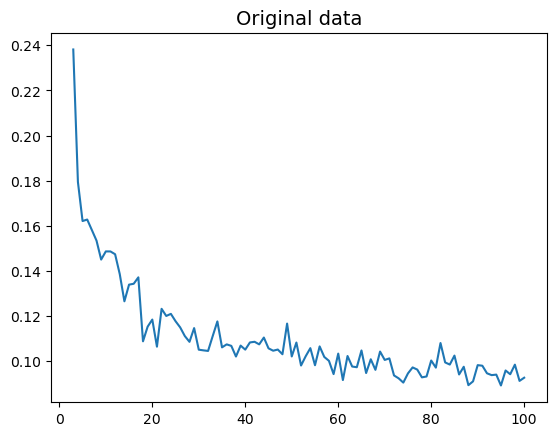

In [102]:
plt.plot(noclusters, silhouette_scores[0])
plt.title("Original data", fontsize=14)

plt.show()

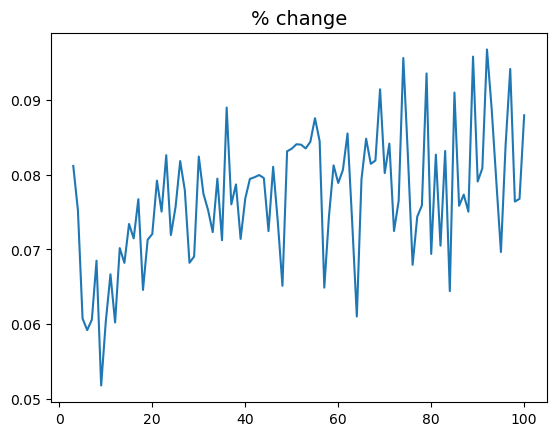

In [103]:
plt.plot(noclusters, silhouette_scores[1])
plt.title("% change", fontsize=14)

plt.show()

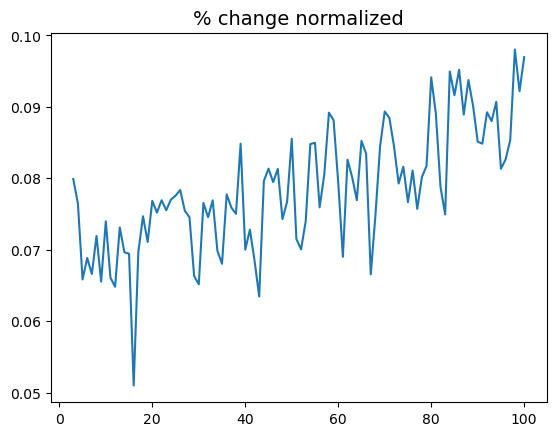

In [105]:
plt.plot(noclusters, silhouette_scores[2])
plt.title("% change normalized", fontsize=14)

plt.show()